In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")

In [13]:
import plotly.express as px

In [11]:
from fbprophet import Prophet

In [2]:
df= pd.read_csv('covid_19_data[2].csv')

In [3]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [4]:
df.shape

(306429, 8)

In [128]:
#rename columns

In [5]:
df =df.rename(columns = {"Province/State":"State","Country/Region":"Country","ObservationDate":"Date"})
df.head()

,SNo,Date,State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [6]:
#taking the covid cases of India from the dataset
India_cases=df[df["Country"]=="India"]
data = pd.DataFrame(India_cases)
data.head()

,SNo,Date,State,Country,Last Update,Confirmed,Deaths,Recovered
446,447,01/30/2020,NaN,India,1/30/20 16:00,1.0,0.0,0.0
509,510,01/31/2020,NaN,India,1/31/2020 23:59,1.0,0.0,0.0
567,568,02/01/2020,NaN,India,1/31/2020 8:15,1.0,0.0,0.0
629,630,02/02/2020,NaN,India,2020-02-02T06:03:08,2.0,0.0,0.0
696,697,02/03/2020,NaN,India,2020-02-03T21:43:02,3.0,0.0,0.0


In [7]:
confirmed = data.groupby('Date').sum()['Confirmed'].reset_index()
confirmed

,Date,Confirmed
0,01/01/2021,10286709.0
1,01/02/2021,10323965.0
2,01/03/2021,10340469.0
3,01/04/2021,10356844.0
4,01/05/2021,10374932.0
...,...,...
481,12/27/2020,10207871.0
482,12/28/2020,10224303.0
483,12/29/2020,10244852.0
484,12/30/2020,10266674.0


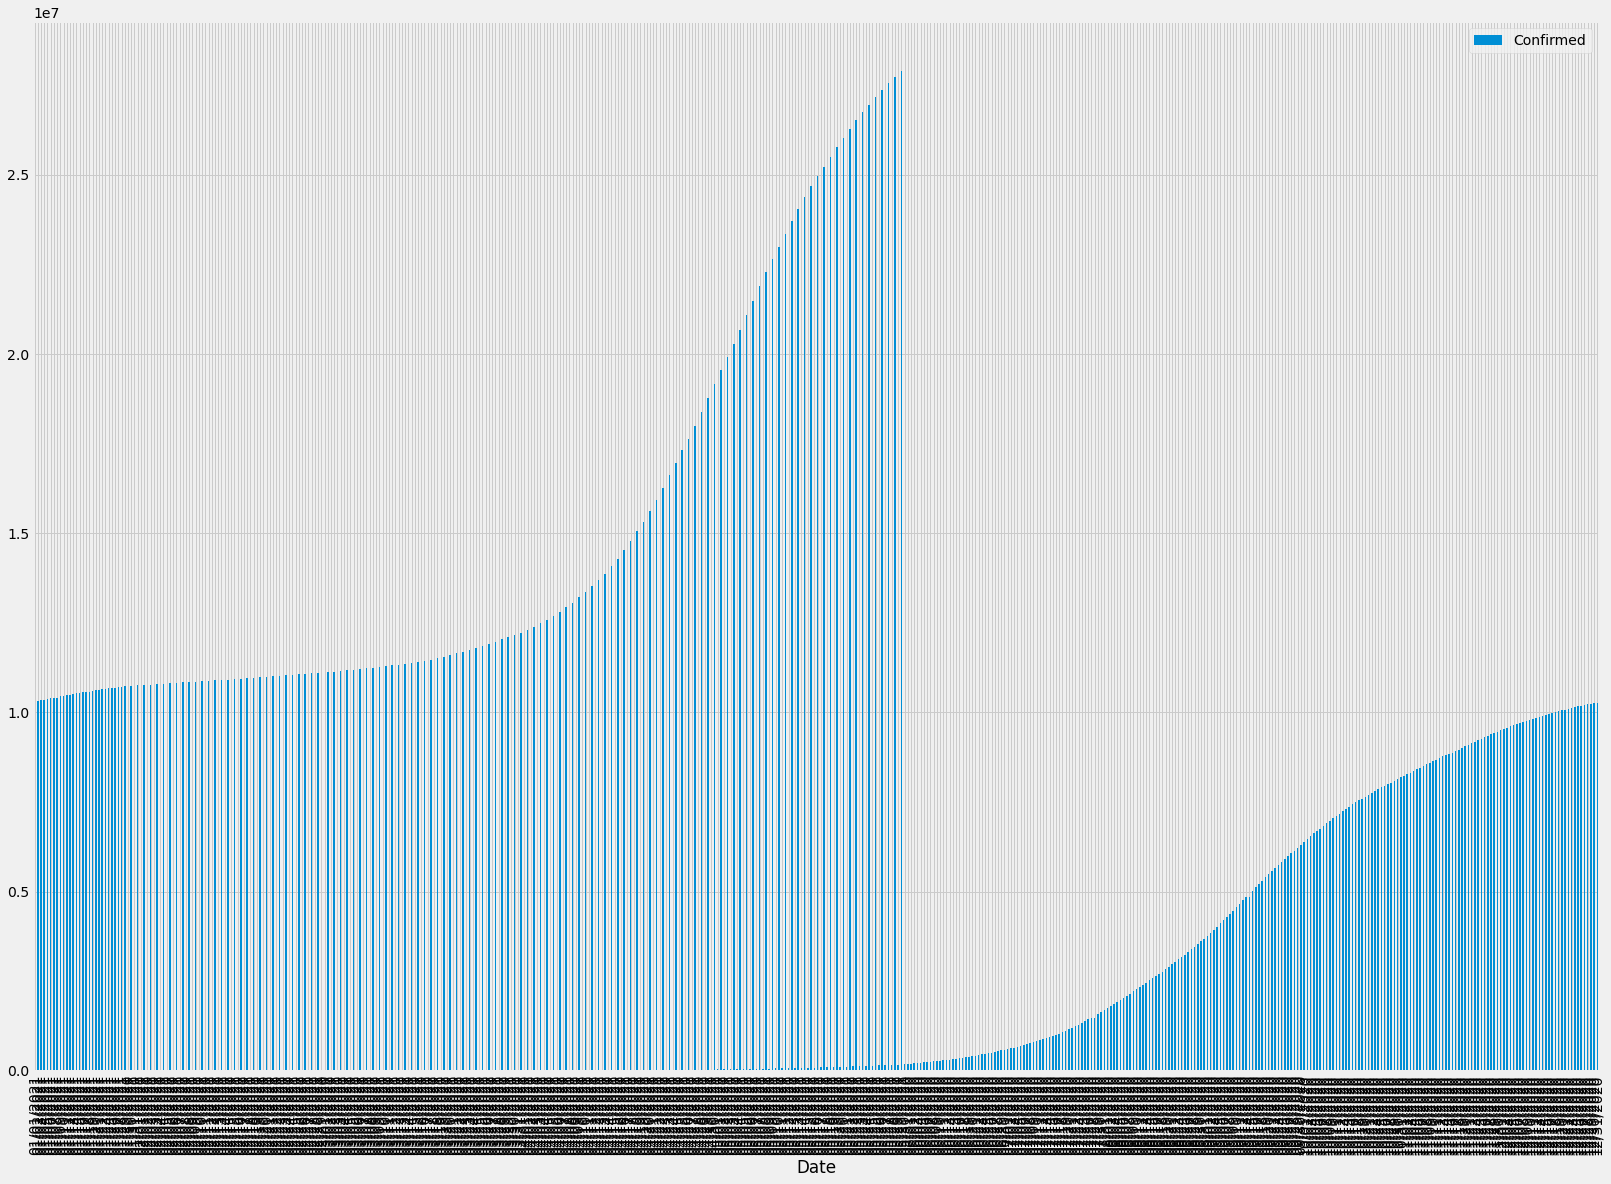

In [8]:
plt.rcParams['figure.figsize']=25,18
#Pandas Visualization 
confirmed.plot(kind='bar',x='Date',y='Confirmed')
plt.show()

In [116]:
deaths = data.groupby('Date').sum()['Deaths'].reset_index()
deaths.tail()

,Date,Deaths
481,12/27/2020,147901.000
482,12/28/2020,148153.000
483,12/29/2020,148439.000
484,12/30/2020,148738.000
485,12/31/2020,148738.000


<AxesSubplot:>

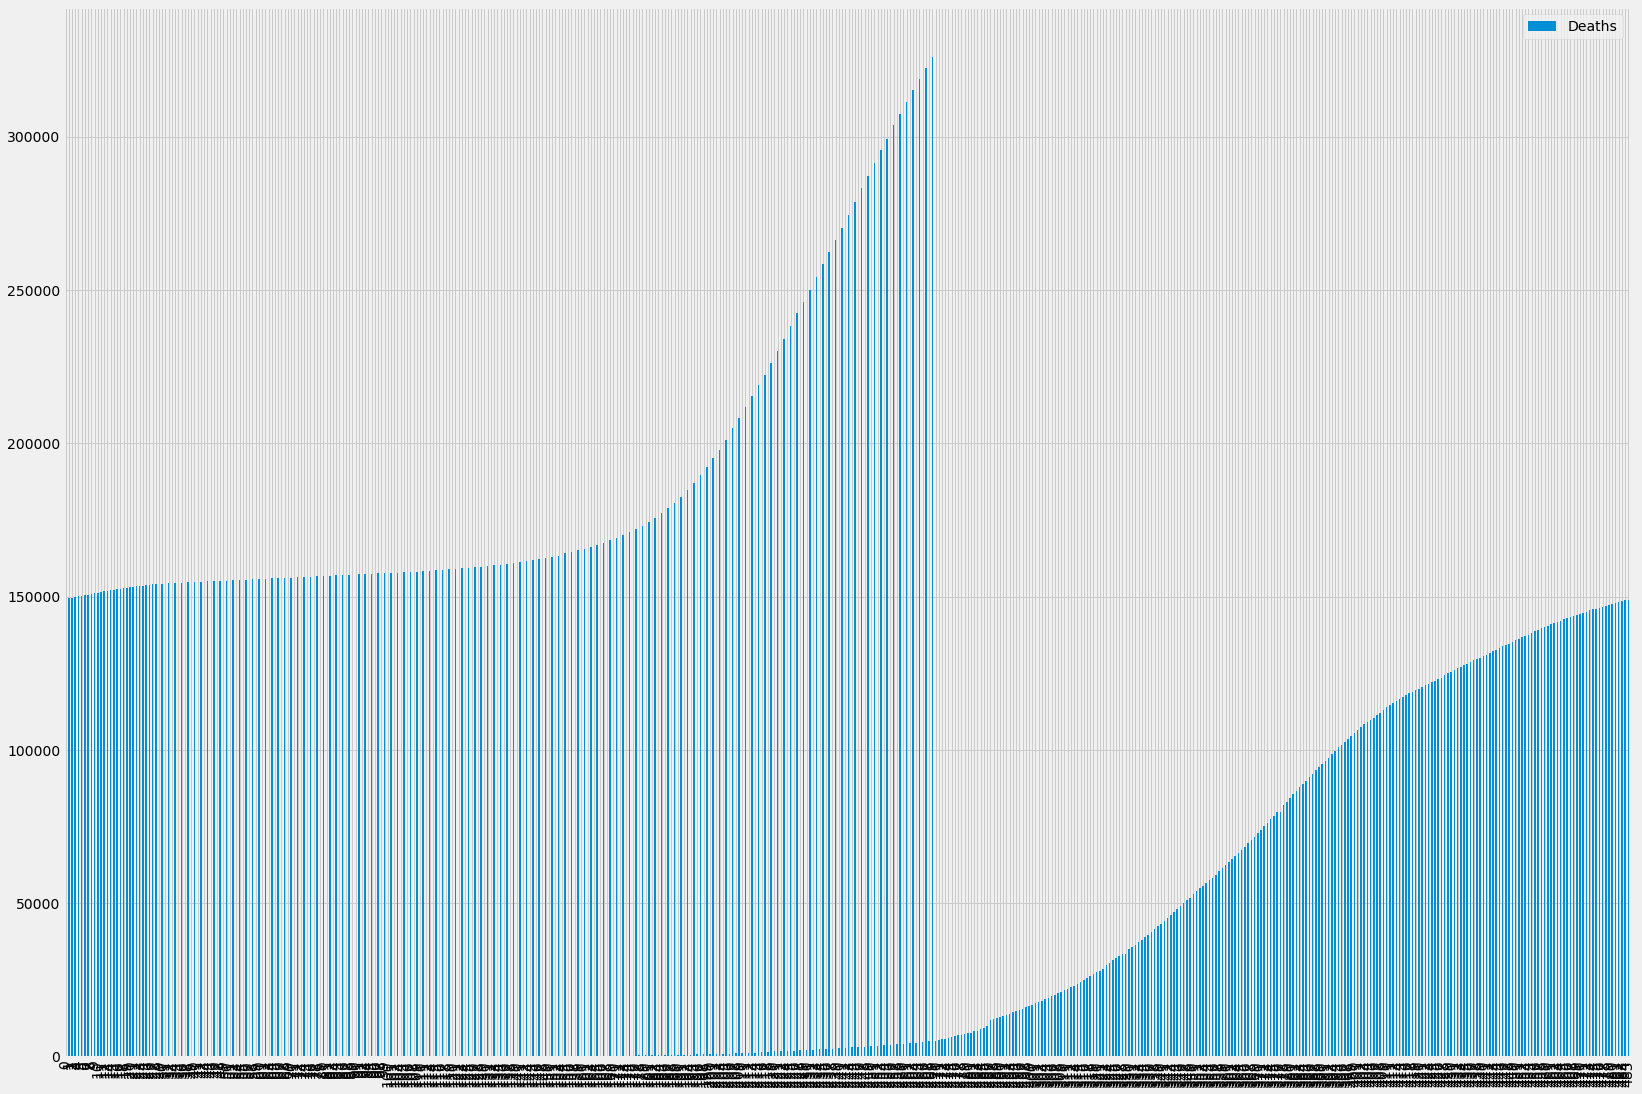

In [117]:
deaths.plot(kind = "bar")

In [97]:

recovered = data.groupby('Date').sum()['Recovered'].reset_index()
recovered.tail()

,Date,Recovered
481,12/27/2020,9782669.000
482,12/28/2020,9807569.000
483,12/29/2020,9834141.000
484,12/30/2020,9860280.000
485,12/31/2020,9860280.000


In [14]:
data.head()

,SNo,Date,State,Country,Last Update,Confirmed,Deaths,Recovered
446,447,01/30/2020,NaN,India,1/30/20 16:00,1.0,0.0,0.0
509,510,01/31/2020,NaN,India,1/31/2020 23:59,1.0,0.0,0.0
567,568,02/01/2020,NaN,India,1/31/2020 8:15,1.0,0.0,0.0
629,630,02/02/2020,NaN,India,2020-02-02T06:03:08,2.0,0.0,0.0
696,697,02/03/2020,NaN,India,2020-02-03T21:43:02,3.0,0.0,0.0


In [98]:
confirmed = data.groupby('Date').sum()['Confirmed'].reset_index()
deaths = data.groupby('Date').sum()['Deaths'].reset_index()
recovered = data.groupby('Date').sum()['Recovered'].reset_index()


In [99]:
confirmed.tail()

,Date,Confirmed
481,12/27/2020,10207871.000
482,12/28/2020,10224303.000
483,12/29/2020,10244852.000
484,12/30/2020,10266674.000
485,12/31/2020,10266674.000


In [100]:
deaths.tail()

,Date,Deaths
481,12/27/2020,147901.000
482,12/28/2020,148153.000
483,12/29/2020,148439.000
484,12/30/2020,148738.000
485,12/31/2020,148738.000


In [101]:
recovered.tail()

,Date,Recovered
481,12/27/2020,9782669.000
482,12/28/2020,9807569.000
483,12/29/2020,9834141.000
484,12/30/2020,9860280.000
485,12/31/2020,9860280.000


The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

In [121]:
confirmed.columns = ['ds','y']
#confirmed['ds'] = confirmed['ds'].dt.date
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [122]:
confirmed.head()

,ds,y
0,2021-01-01,10286709.000
1,2021-01-02,10323965.000
2,2021-01-03,10340469.000
3,2021-01-04,10356844.000
4,2021-01-05,10374932.000


# 4.1 Forecasting Confirmed NCOVID-19 Cases Worldwide with Prophet (Base model)


Generating a week ahead forecast of confirmed cases of NCOVID-19 using Prophet, with 95% prediction interval by creating a base model with no tweaking of seasonality-related parameters and additional regressors.

In [123]:
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [124]:

m = Prophet(interval_width=0.95) #Interval width is the prediction accuracy we count on the model
m.fit(confirmed)
future = m.make_future_dataframe(periods=50) #making a dataframe for no. of date

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [125]:
future.tail()

,ds
531,2021-07-14
532,2021-07-15
533,2021-07-16
534,2021-07-17
535,2021-07-18


In [126]:
#predicting the future with date, and upper and lower limit of y value
forecast = m.predict(future)
forecast[['ds', 'yhat',"yhat_lower", 'yhat_upper']].tail(20)


#ds= date
#yhat = prediction
#lower & upper = limit

,ds,yhat,yhat_lower,yhat_upper
516,2021-06-29,28743700.891,26544060.742,30904783.522
517,2021-06-30,28904637.964,26545162.170,31217667.931
518,2021-07-01,29066617.882,26737891.668,31515770.487
519,2021-07-02,29227417.942,26850377.849,31723458.937
520,2021-07-03,29388681.274,27077370.141,31736435.382
521,2021-07-04,29489833.206,27129148.577,31842412.563
522,2021-07-05,29639447.311,27133981.269,32274679.340
523,2021-07-06,29795919.597,27414265.543,32145791.996
524,2021-07-07,29956856.670,27587565.915,32553546.533
525,2021-07-08,30118836.588,27649347.211,32751602.189


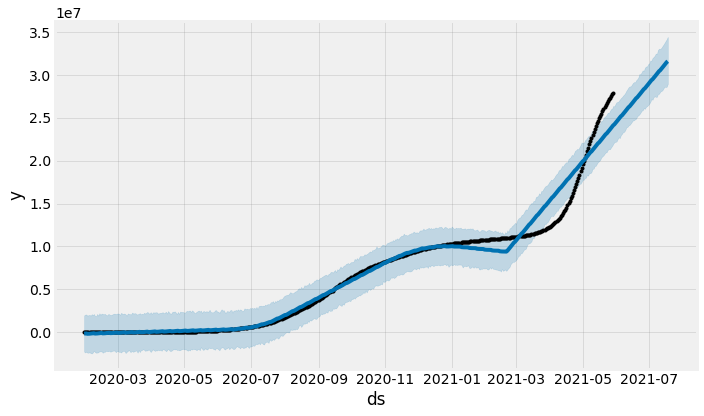

In [89]:
confirmed_forecast_plot = m.plot(forecast)

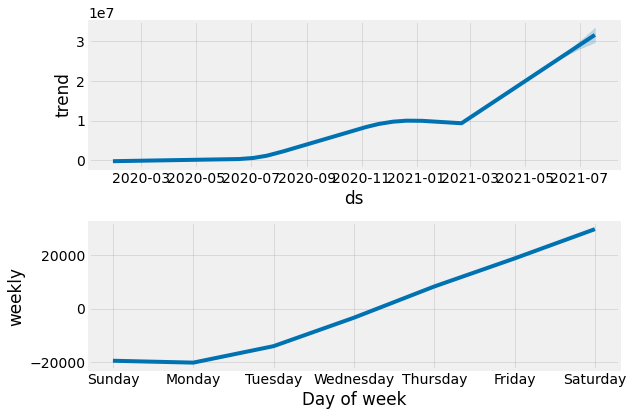

In [91]:
confirmed_forecast_plot =m.plot_components(forecast)

# Predicting the recovered number of cases 

In [102]:
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])

In [103]:
m = Prophet(interval_width=0.95)
m.fit(recovered)
future = m.make_future_dataframe(periods=50)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
531,2021-07-14
532,2021-07-15
533,2021-07-16
534,2021-07-17
535,2021-07-18


In [104]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(20)

,ds,yhat,yhat_lower,yhat_upper
516,2021-06-29,23705987.657,21470174.114,25809996.242
517,2021-06-30,23826719.626,21521543.705,26036131.462
518,2021-07-01,23948877.116,21875895.242,25928844.261
519,2021-07-02,24070671.785,21852081.476,26242562.111
520,2021-07-03,24194719.265,22105598.233,26557943.473
521,2021-07-04,24237593.137,22076445.329,26398346.798
522,2021-07-05,24357404.078,22003987.786,26579383.992
523,2021-07-06,24478092.922,22306557.674,26613289.671
524,2021-07-07,24598824.891,22328577.020,26845826.409
525,2021-07-08,24720982.381,22571755.207,27019736.980


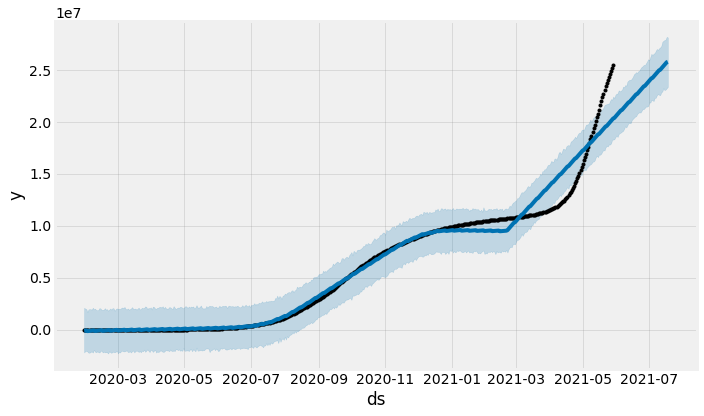

In [105]:
recovered_forecast_plot = m.plot(forecast)

# Predicting the number of deaths

In [107]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

In [109]:
m = Prophet(interval_width=0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods=50)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
531,2021-07-14
532,2021-07-15
533,2021-07-16
534,2021-07-17
535,2021-07-18


In [110]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(20)

,ds,yhat,yhat_lower,yhat_upper
516,2021-06-29,302140.457,276286.320,329059.949
517,2021-06-30,303530.219,277119.046,327374.636
518,2021-07-01,304956.325,277500.189,331276.791
519,2021-07-02,306345.635,279269.516,331908.312
520,2021-07-03,307732.069,281807.435,332835.712
521,2021-07-04,308154.421,280406.636,335121.222
522,2021-07-05,309441.441,282816.382,334488.965
523,2021-07-06,310846.545,284609.213,337191.078
524,2021-07-07,312236.307,284390.318,340470.304
525,2021-07-08,313662.413,286946.815,340172.911


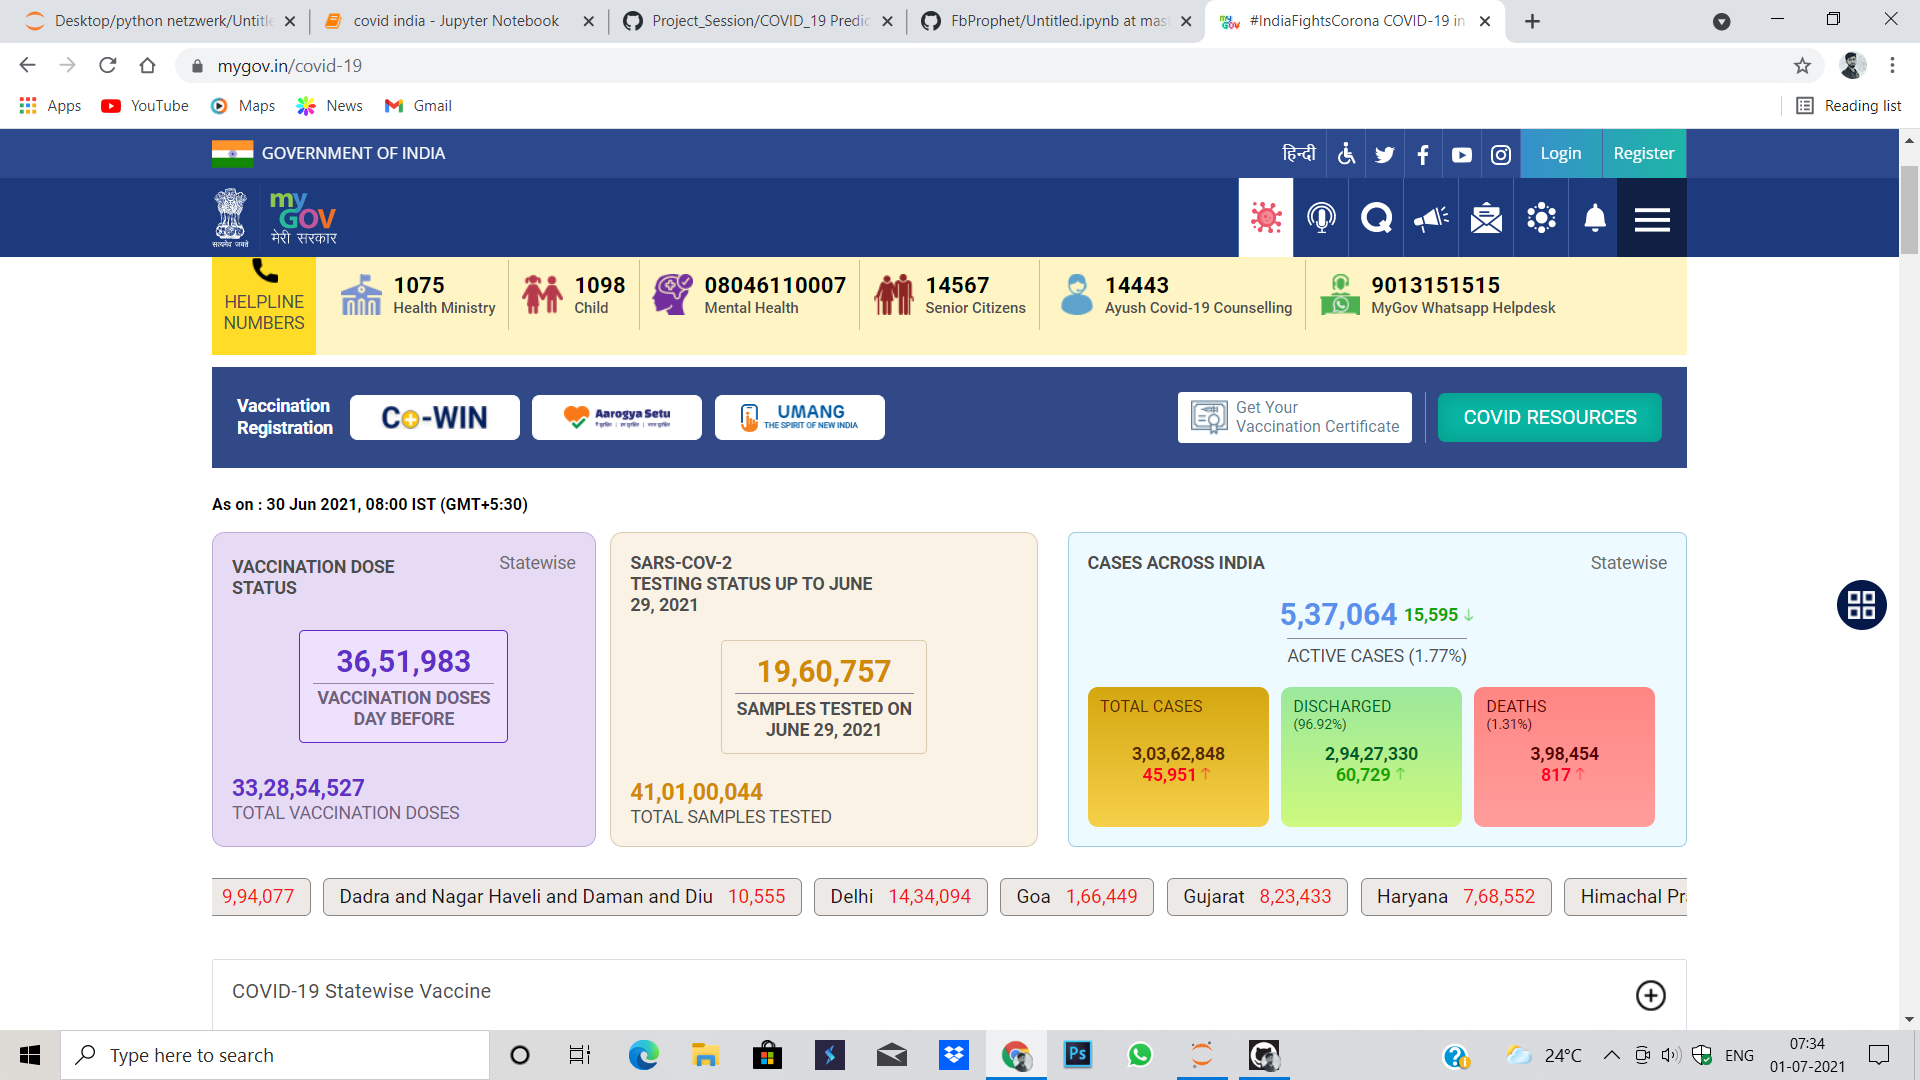

In [83]:
from PIL import Image
img = Image.open("covidss.png")
img

In [111]:

prediction=pd.DataFrame()
prediction["cases"]=["Confirmed","Recovered","Deaths"]
prediction["model predicted"]=[29066617,23948877,304956]
prediction["actual"]=[30362848,29427330,398454]

In [112]:
prediction

,cases,model predicted,actual
0,Confirmed,29066617,30362848
1,Recovered,23948877,29427330
2,Deaths,304956,398454


# With the help of fb prophet number of covid-19 cases in India is predicted till 18 july 2021(till today) and created a table of actual cases and the number of cases predicited.